In [14]:
import pandas as pd

import numpy as np

import time,datetime

import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns

import calendar

In [15]:
uber_data = pd.read_csv('/content/UberDataset.csv')
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [16]:
#Now lets rename the columns and remove '*' from columns' name.
uber_data = uber_data.rename(columns = {uber_data.columns[0]:'START_DATE',
                                        uber_data.columns[1]:'END_DATE',
                                        uber_data.columns[2]:'CATEGORY',
                                        uber_data.columns[3]:'START',
                                        uber_data.columns[4]:'STOP',
                                        uber_data.columns[5]: 'MILES',
                                        uber_data.columns[6]:'PURPOSE'})

In [17]:
print(uber_data.isnull().sum())
print(uber_data.isnull().sum().sum())

uber_data=uber_data.dropna()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64
507


In [18]:
uber_data[uber_data.START.str.contains('\?') == True]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
140,2/20/2016 14:50,2/20/2016 15:54,Business,R?walpindi,R?walpindi,23.1,Meeting
1119,12/27/2016 7:02,12/27/2016 7:14,Business,Kar?chi,Kar?chi,4.9,Temporary Site
1120,12/27/2016 8:37,12/27/2016 8:59,Business,Kar?chi,Kar?chi,5.0,Meal/Entertain
1121,12/27/2016 12:53,12/27/2016 12:57,Business,Kar?chi,Kar?chi,0.6,Meal/Entertain
1122,12/27/2016 14:49,12/27/2016 15:03,Business,Kar?chi,Unknown Location,3.1,Customer Visit
1124,12/27/2016 19:19,12/27/2016 19:50,Business,Kar?chi,Kar?chi,5.5,Customer Visit
1125,12/28/2016 8:34,12/28/2016 9:06,Business,Kar?chi,Unknown Location,10.3,Meal/Entertain
1127,12/28/2016 13:53,12/28/2016 14:01,Business,Kar?chi,Kar?chi,2.0,Errand/Supplies
1128,12/28/2016 15:04,12/28/2016 15:39,Business,Kar?chi,Unknown Location,8.5,Meal/Entertain
1130,12/28/2016 18:33,12/28/2016 18:56,Business,Kar?chi,Kar?chi,3.8,Errand/Supplies


In [19]:
uber_data['START'] = uber_data['START'].replace({"\?":"a"}, regex = True)
uber_data["STOP"] = uber_data["STOP"].replace({"\?":"a"}, regex = True)

In [22]:
# Example format: 'MM/DD/YYYY HH:MM'
date_format = "%m/%d/%Y %H:%M"

uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format=date_format, errors='coerce')
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], format=date_format, errors='coerce')


In [23]:
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')


In [24]:
uber_data['HOUR'] = uber_data['START_DATE'].dt.hour
uber_data['DAY'] = uber_data['START_DATE'].dt.day
uber_data['MONTH'] = uber_data['START_DATE'].dt.month
uber_data['WEEKDAY'] = uber_data['START_DATE'].dt.day_name()
uber_data['DAY_OF_WEEK'] = uber_data['START_DATE'].dt.dayofweek


In [25]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,NaN,NaN,NaN,NaN,NaN
2,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,NaN,NaN,NaN,NaN,NaN
3,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.7,Meeting,NaN,NaN,NaN,NaN,NaN
4,NaT,NaT,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NaN,NaN,NaN,NaN,NaN
5,NaT,NaT,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CATEGORY', ylabel='count'>

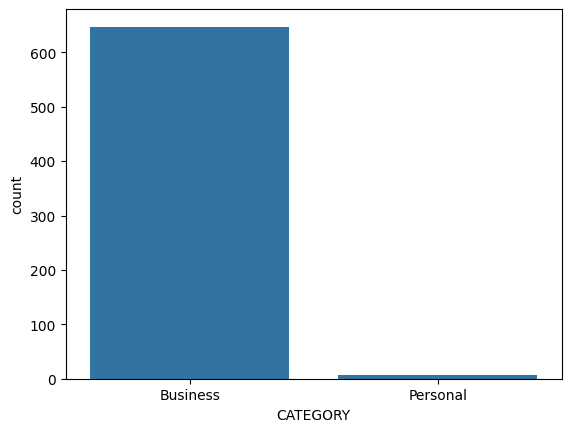

In [26]:
sns . countplot(x= 'CATEGORY' ,data=uber_data)

<Axes: xlabel='count', ylabel='PURPOSE'>

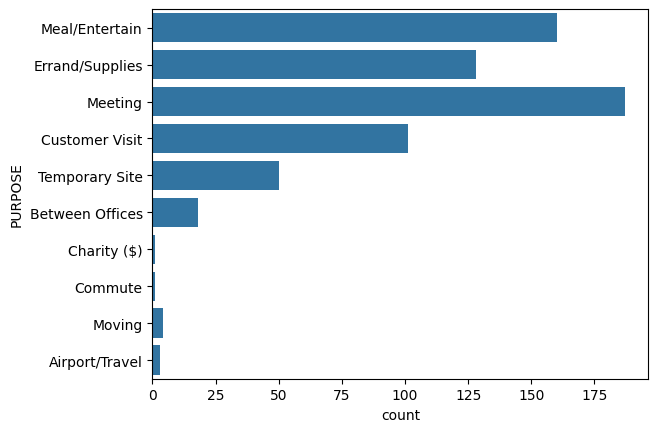

In [27]:
sns . countplot(y= 'PURPOSE' ,data=uber_data)

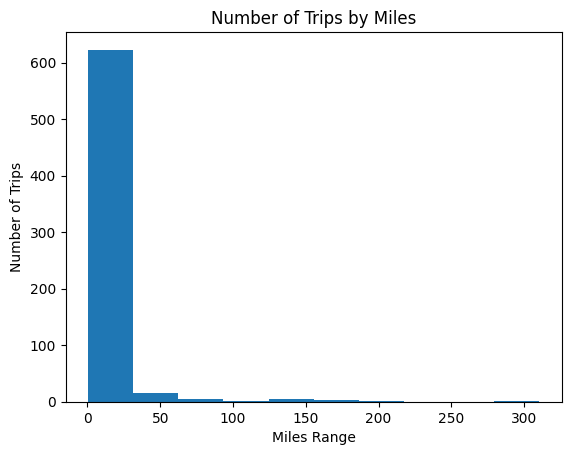

In [28]:
uber_data[ 'MILES' ].plot.hist()

plt.xlabel("Miles Range")
plt.ylabel("Number of Trips")

# setting y_label as price
plt.title("Number of Trips by Miles")
plt.show()

Text(0.5, 1.0, 'Number of trips Vs hours')

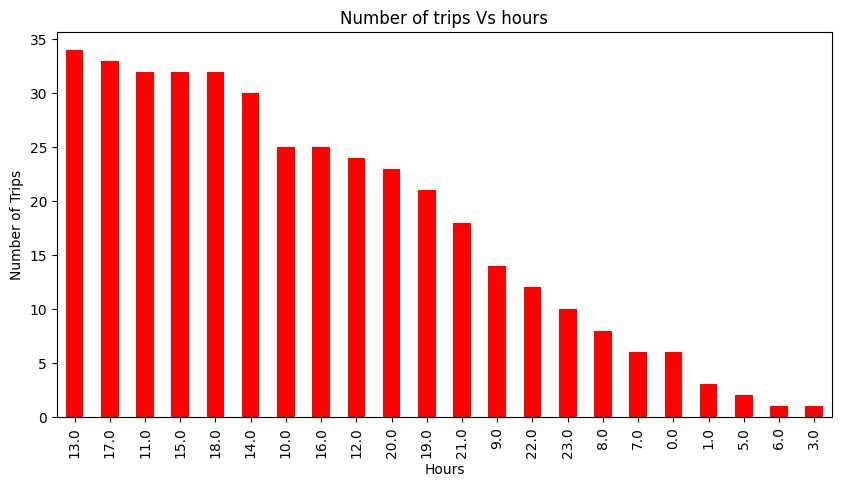

In [29]:
hours = uber_data['HOUR'].value_counts()
hours.plot(kind= 'bar', color= 'red', figsize= (10,5))
plt.xlabel( 'Hours' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs hours')

Text(0.5, 1.0, 'Number of trips Vs days')

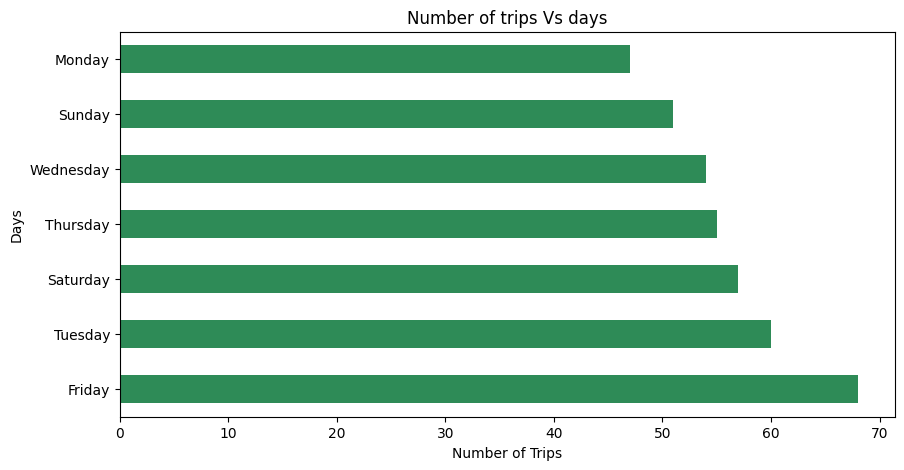

In [30]:
days = uber_data[ 'WEEKDAY' ].value_counts()
days.plot(kind='barh', color= 'seagreen', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Days' )
plt.title( 'Number of trips Vs days')

Text(0.5, 1.0, 'Number of trips Vs Months')

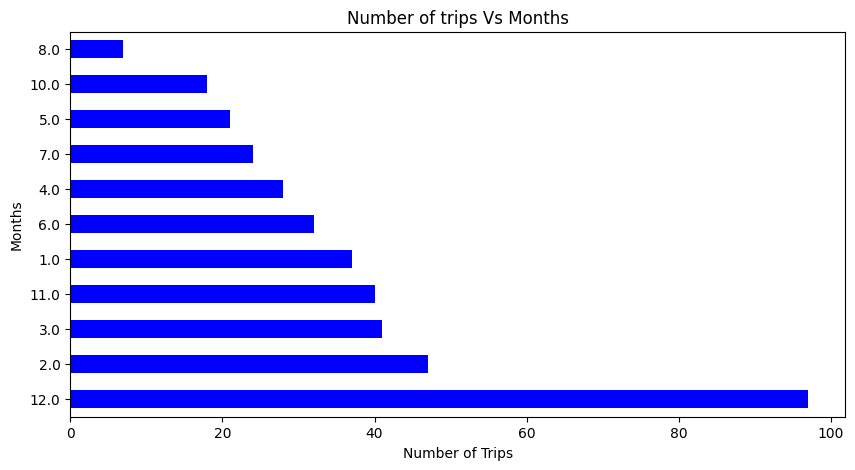

In [31]:
months = uber_data[ 'MONTH' ].value_counts()
months.plot(kind='barh', color= 'blue', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Months' )
plt.title( 'Number of trips Vs Months')

Text(0.5, 1.0, 'Number of trips Vs days of december')

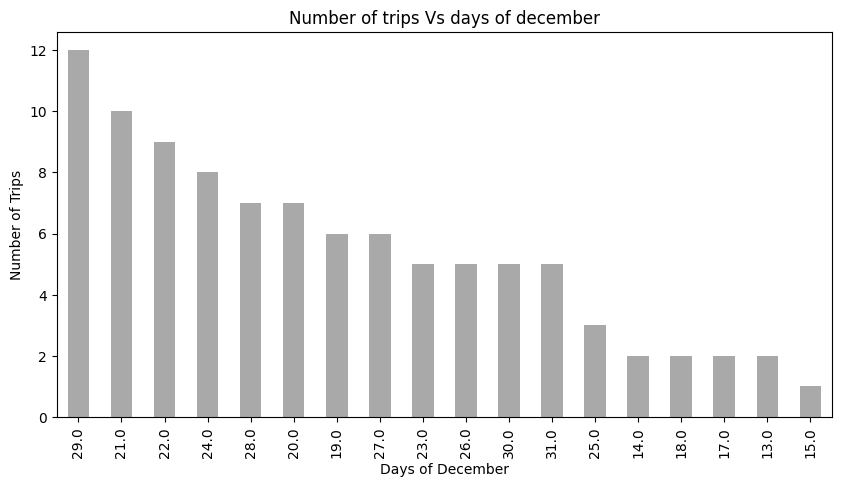

In [32]:
months = uber_data[ 'DAY' ][uber_data['MONTH']==12].value_counts()
months.plot(kind='bar', color= 'darkgray', figsize=(10, 5) )
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of december')

Text(0.5, 1.0, 'Number of Trips by Pickup points')

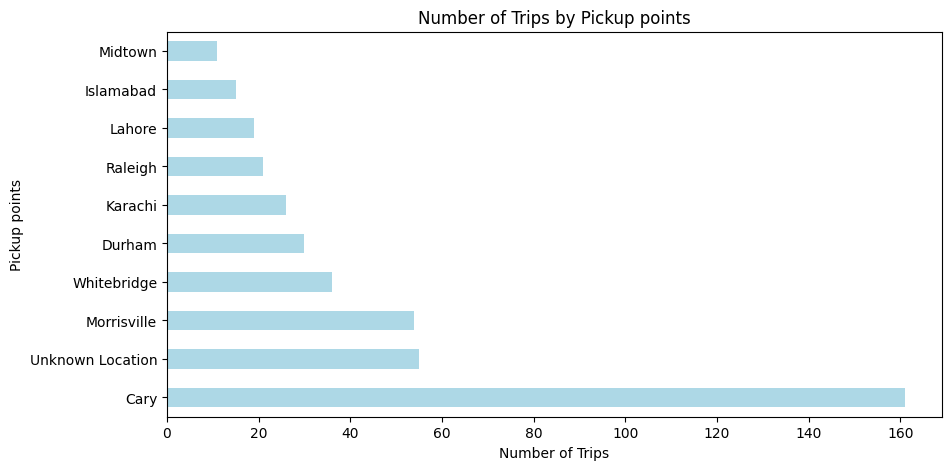

In [33]:
pic_point = uber_data[ 'START' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'lightblue', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')

Text(0.5, 1.0, 'Number of Trips by Drop points')

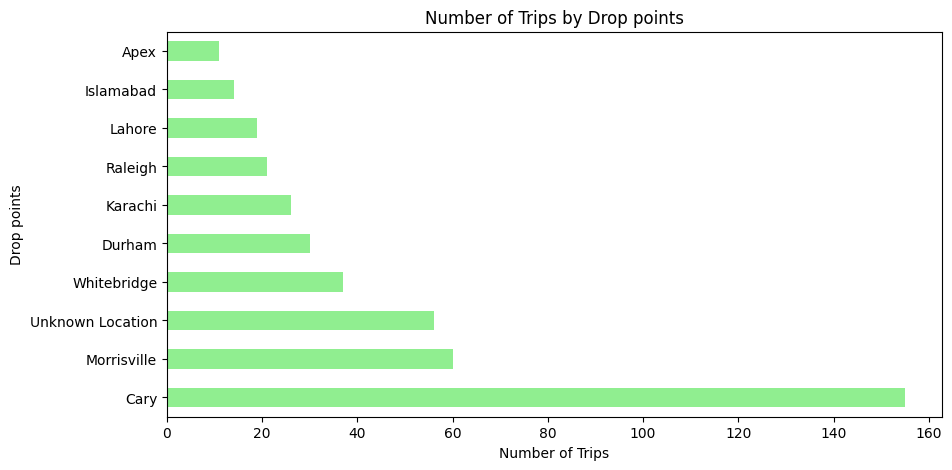

In [34]:
drop_point = uber_data[ 'STOP' ].value_counts().nlargest(10)
drop_point.plot(kind='barh', color= 'lightgreen', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop points' )
plt.title( 'Number of Trips by Drop points')

Text(0.5, 1.0, 'points - points Trips Counts')

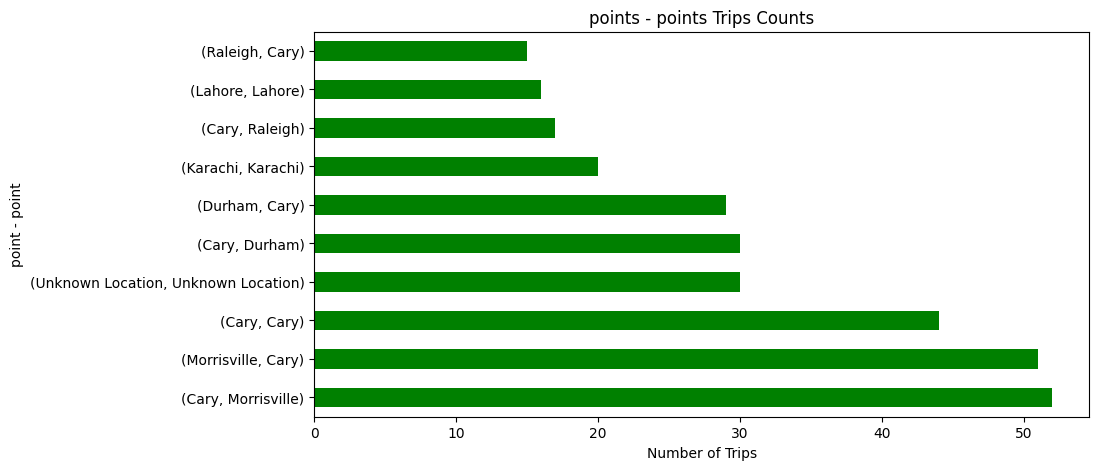

In [35]:
p_p = uber_data[[ 'START', 'STOP'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'green', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

In [36]:
print("\n..........Average Length of the Trip..............\n")
print('Business:', round(uber_data[uber_data['CATEGORY'] == 'Business'].MILES.mean(), 3))
print('Personal:', round(uber_data[uber_data['CATEGORY'] == 'Personal'].MILES.mean(), 3))
print('Meal/Entertain:', round(uber_data[uber_data['PURPOSE'] == 'Meal/Entertain'].MILES.mean(), 3))


..........Average Length of the Trip..............

Business: 10.97
Personal: 35.583
Meal/Entertain: 5.698


In [40]:
data2 = pd.read_csv('/content/share_ride.csv' )

In [41]:
data2.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,16-12-2018 09:30,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,27-11-2018 02:00,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,28-11-2018 01:00,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,30-11-2018 04:53,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,29-11-2018 03:49,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


In [42]:
extra_cols = [ 'apparentTemperature', 'precipIntensity' ,
'humidity',
'windSpeed',
'apparentTemperatureHigh',
'dewPoint',
'precipIntensityMax',
'apparentTemperatureMax',
'cloudCover',
'moonPhase',
'windGustTime',
'visibility',
'temperatureHighTime' ,
'apparentTemperatureHighTime',
'apparentTemperatureLow' ,
'apparentTemperatureLowTime',
'temperatureMinTime' ,
'temperatureMaxTime',
'apparentTemperatureMin',
'apparentTemperatureMinTime', 'apparentTemperatureMaxTime',
'windBearing' ,
'sunriseTime',
'uvIndex' ,
'visibility.1',
'ozone',
'sunsetTime', 'uvIndexTime']
data2 = data2.drop(extra_cols, axis=1)

In [43]:
data2.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipProbability', 'windGust',
       'temperatureHigh', 'temperatureLow', 'temperatureLowTime', 'icon',
       'pressure', 'temperatureMin', 'temperatureMax'],
      dtype='object')

In [44]:
data2.sample(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,long_summary,precipProbability,windGust,temperatureHigh,temperatureLow,temperatureLowTime,icon,pressure,temperatureMin,temperatureMax
3782,420387d2-e3a3-4aa7-8e38-89781ab7596b,1.545064e+09,16,17,12,17-12-2018 16:30,America/New_York,North Station,Northeastern University,Lyft,...,Light rain in the morning.,0.00,7.24,41.44,24.05,1.545134e+09,cloudy,1001.67,34.22,41.44
4315,35c5c33b-7390-4ab5-a0d8-e3a7605c58a3,1.545064e+09,16,17,12,17-12-2018 16:30,America/New_York,Boston University,West End,Uber,...,Light rain in the morning.,0.00,7.24,41.44,24.05,1.545134e+09,cloudy,1001.67,34.22,41.44
3469,cd319480-e3cb-47e5-a43f-0a0c9b7c97e8,1.543453e+09,0,29,11,29-11-2018 00:51,America/New_York,Beacon Hill,Fenway,Lyft,...,Mostly cloudy throughout the day.,0.00,12.21,42.72,37.59,1.543486e+09,partly-cloudy-night,996.21,33.82,42.72
1539,a74e3d49-a128-4e0f-9414-81507e8f0ebc,1.543316e+09,10,27,11,27-11-2018 10:45,America/New_York,Fenway,West End,Uber,...,Light rain in the morning.,1.00,7.42,46.91,33.82,1.543399e+09,rain,989.98,36.34,46.91
2685,d6053a46-1e50-47ae-b2fe-d9733854ad50,1.545069e+09,17,17,12,17-12-2018 17:55,America/New_York,Northeastern University,North Station,Uber,...,Light rain in the morning and overnight.,0.00,7.78,40.61,24.07,1.545131e+09,cloudy,1001.22,34.19,40.66
3809,eb73d225-1e1c-4ab1-aa99-a1eb4ca2cf47,1.544958e+09,11,16,12,16-12-2018 11:00,America/New_York,Boston University,Beacon Hill,Lyft,...,Rain throughout the day.,0.00,7.75,43.61,34.22,1.545044e+09,cloudy,1022.73,38.48,43.61
2208,15a0c122-a724-4147-b76d-f24f304fe262,1.544775e+09,8,14,12,14-12-2018 08:05,America/New_York,Back Bay,Haymarket Square,Lyft,...,Partly cloudy throughout the day.,0.00,2.87,46.45,40.89,1.544832e+09,partly-cloudy-night,1033.96,27.07,46.45
5772,5cd152ac-3387-4064-b192-553a2980e0b5,1.543285e+09,2,27,11,27-11-2018 02:09,America/New_York,Beacon Hill,Northeastern University,Lyft,...,"Rain until morning, starting again in the eve...",1.00,11.98,47.30,42.10,1.543298e+09,rain,1003.97,40.49,47.30
1802,13adb48f-f6e2-480e-85dd-78b8a2f8585d,1.543663e+09,11,1,12,01-12-2018 11:22,America/New_York,Fenway,Theatre District,Uber,...,Light rain in the morning and overnight.,0.00,4.75,44.66,35.04,1.543712e+09,partly-cloudy-night,1021.74,31.71,44.66
3908,18d0fdae-34a0-43d5-82cc-97ca69904503,1.545029e+09,6,17,12,17-12-2018 06:50,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,Light rain in the morning.,0.56,12.56,41.38,23.98,1.545138e+09,rain,1005.65,34.25,41.38


In [45]:
print(data2.isnull().sum())
print(data2.isnull().sum().sum())
data2=data2.dropna()

id                      0
timestamp               0
hour                    0
day                     0
month                   0
datetime                0
timezone                0
source                  1
destination             1
cab_type                1
product_id              1
name                    1
price                 480
distance                1
surge_multiplier        1
latitude                1
longitude               1
temperature             1
short_summary           1
long_summary            1
precipProbability       1
windGust                1
temperatureHigh         1
temperatureLow          1
temperatureLowTime      1
icon                    1
pressure                1
temperatureMin          1
temperatureMax          1
dtype: int64
501


Text(0.5, 1.0, 'Number of trips Vs hours')

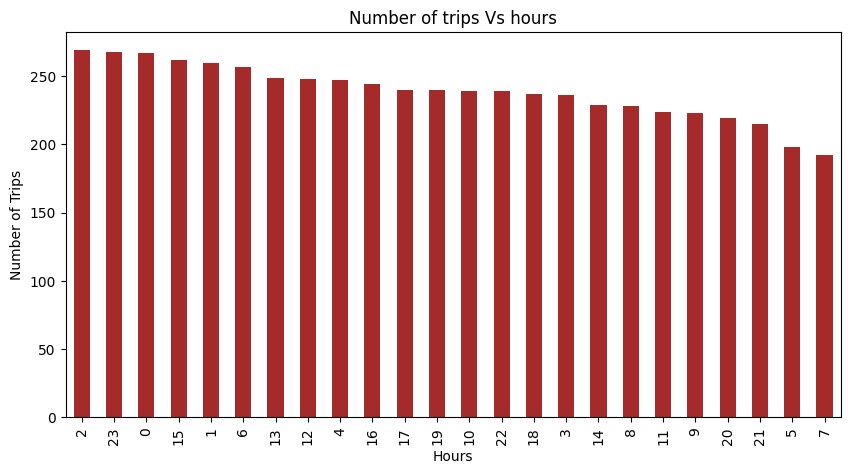

In [46]:
hours = data2['hour'].value_counts()
hours.plot(kind= 'bar', color= 'brown', figsize= (10,5))
plt.xlabel( 'Hours' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs hours')

In [48]:
data2['datetime'] = pd.to_datetime(data2['datetime'], errors='coerce')


<ipython-input-48-5a93be58896f>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data2['datetime'] = pd.to_datetime(data2['datetime'], errors='coerce')


In [49]:
import calendar

# Convert the 'datetime' column to datetime objects
data2['datetime'] = pd.to_datetime(data2['datetime'], errors='coerce')

# Extract the day of the week
day_week = [calendar.day_name[x.dayofweek] for x in data2['datetime']]
day_week = pd.Series(day_week)


Text(0.5, 1.0, 'Number of trips Vs days')

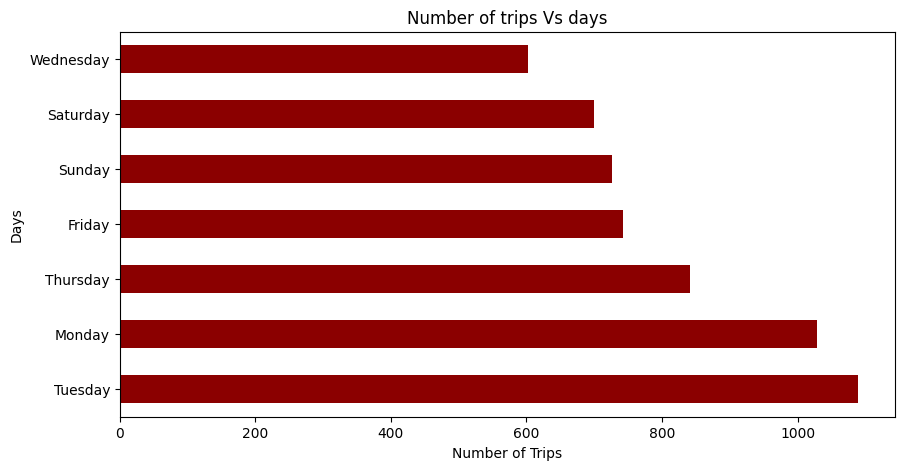

In [50]:
days = day_week.value_counts()
days.plot(kind='barh', color= 'darkred', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Days' )
plt.title( 'Number of trips Vs days')

Text(0.5, 1.0, 'Number of trips Vs Months')

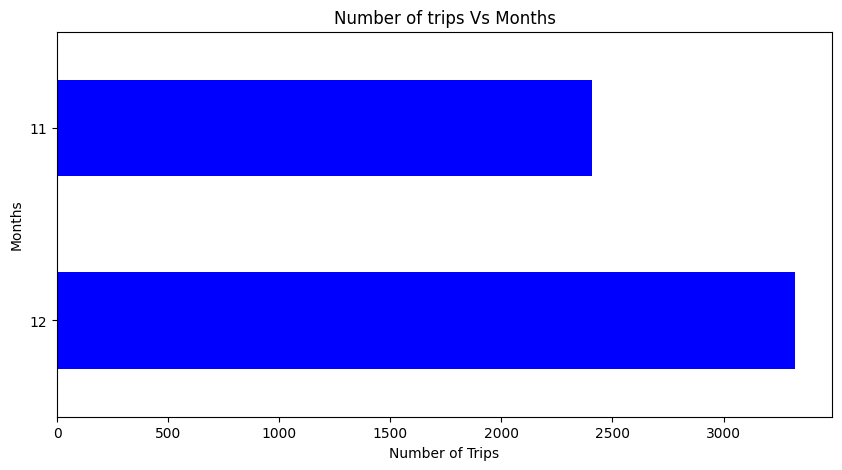

In [51]:
months = data2[ 'month' ].value_counts()
months.plot(kind='barh', color= 'blue', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Months' )
plt.title( 'Number of trips Vs Months')

Text(0.5, 1.0, 'Number of trips Vs days of december')

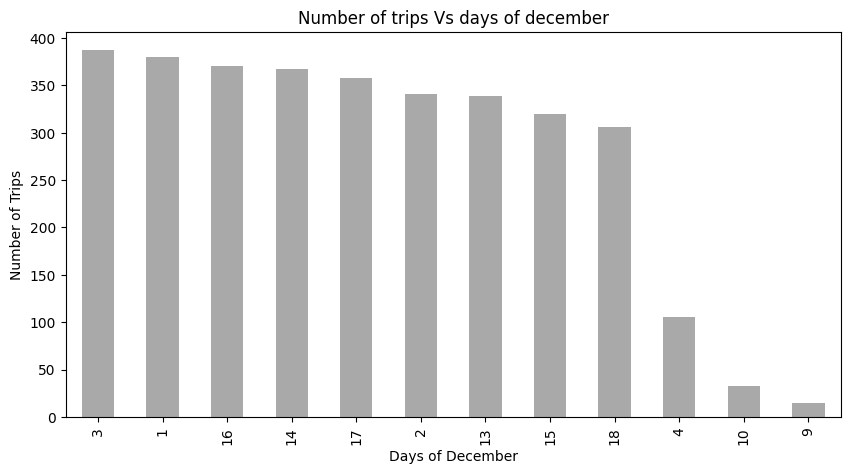

In [52]:
months = data2[ 'day' ][data2['month']==12].value_counts()
months.plot(kind='bar', color= 'darkgray', figsize=(10, 5) )
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of december')

Text(0.5, 1.0, 'Number of Trips by Pickup points')

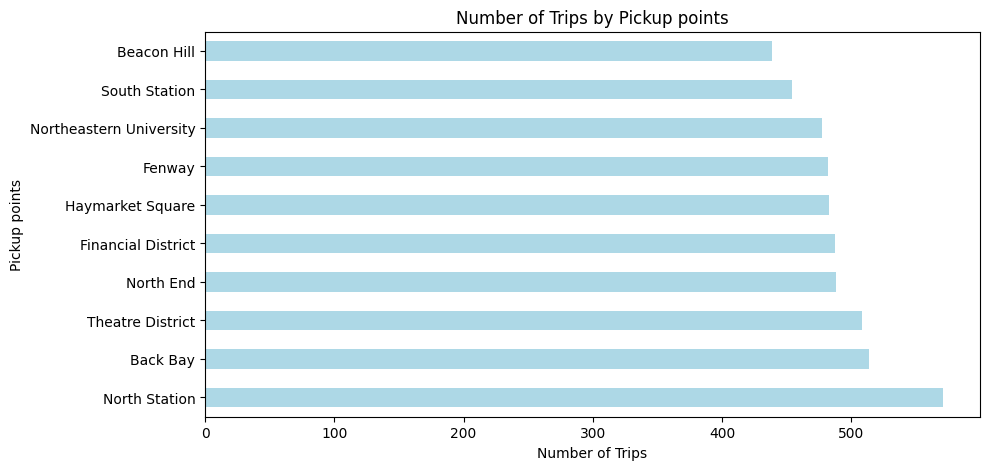

In [53]:
pic_point = data2[ 'source' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'lightblue', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')

Text(0.5, 1.0, 'Number of Trips by Drop points')

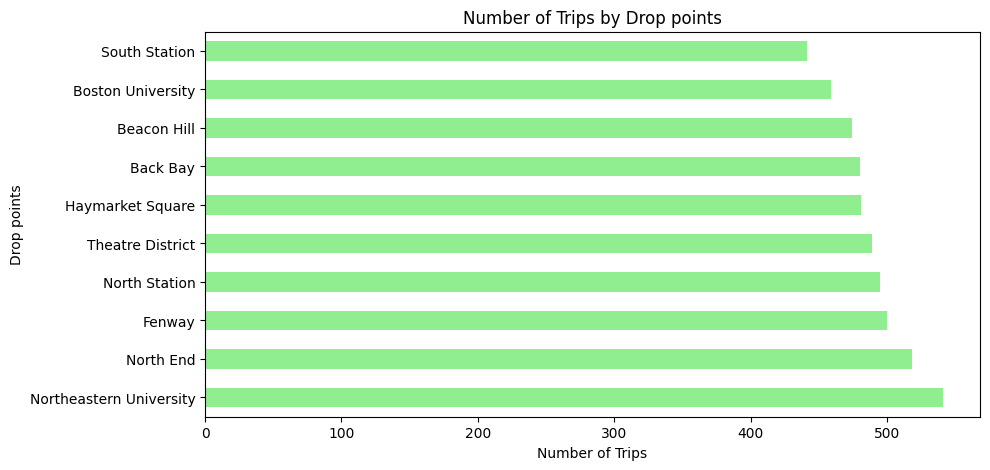

In [54]:
drop_point = data2[ 'destination' ].value_counts().nlargest(10)
drop_point.plot(kind='barh', color= 'lightgreen', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop points' )
plt.title( 'Number of Trips by Drop points')

Text(0.5, 1.0, 'points - points Trips Counts')

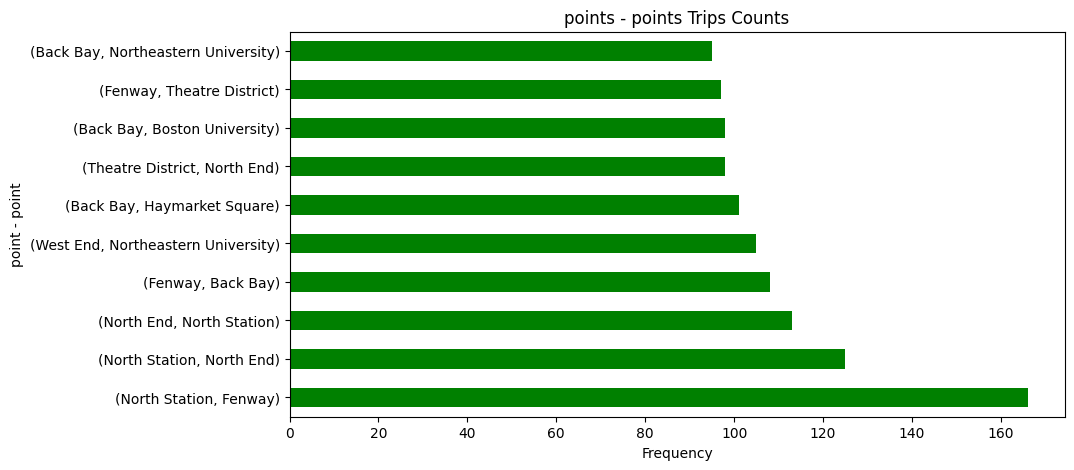

In [55]:
p_p = data2[[ 'source', 'destination'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'green', figsize=(10, 5))
plt.xlabel('Frequency')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

Text(0.5, 1.0, 'Number of Trips by Cabs Name ')

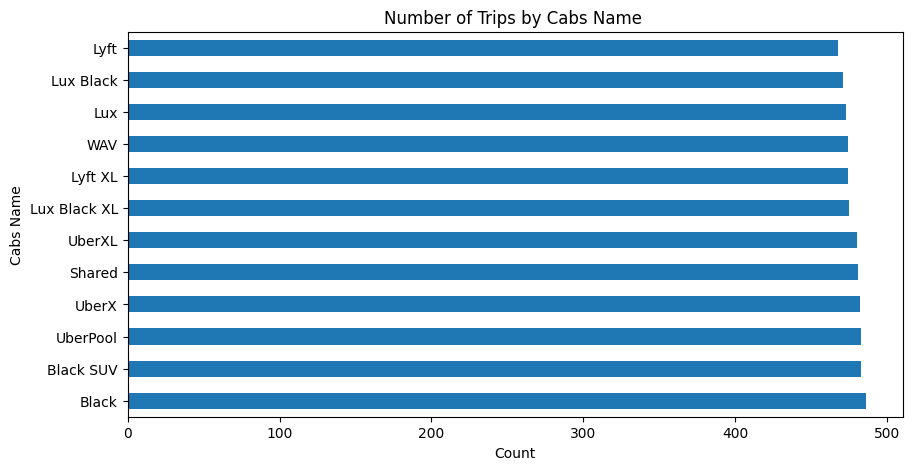

In [56]:
cabs = data2['name'].value_counts()
cabs.plot(kind='barh',figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('Cabs Name' )
plt.title( 'Number of Trips by Cabs Name ')

In [57]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [58]:
data2['id'] = label_encoder.fit_transform(data2['id'])
data2['datetime'] = label_encoder.fit_transform(data2['datetime'])
data2['timezone'] = label_encoder.fit_transform(data2['timezone'])
data2['destination'] = label_encoder.fit_transform(data2['destination'])
data2['product_id'] = label_encoder.fit_transform(data2['product_id'])
data2['short_summary'] = label_encoder.fit_transform(data2['short_summary'])
data2['long_summary'] = label_encoder.fit_transform(data2['long_summary'])
data2['name'] = label_encoder.fit_transform(data2['name'])

In [59]:
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
UberPool --> 8
UberX --> 9
UberXL --> 10
WAV --> 11


In [60]:
data2['source'] = label_encoder.fit_transform(data2['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [61]:
data2['icon'] = label_encoder.fit_transform(data2['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [62]:
data2['cab_type'] = label_encoder.fit_transform(data2['cab_type'])

print("Class mapping of Cabe_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Cabe_type: 
Lyft --> 0
Uber --> 1


In [63]:
len(data2[data2['cab_type']==1])

2888

In [64]:
x = data2[data2['cab_type']==1].drop(['price', 'cab_type'], axis=1)
y = data2[data2['cab_type']==1]['price']

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

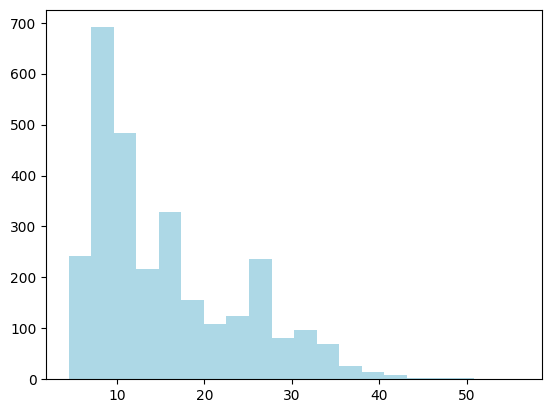

In [66]:
plt.hist(y, bins=20, color = 'lightblue')
plt.show()

In [67]:
from   sklearn.feature_selection   import   RFE
from   sklearn.linear_model   import   LinearRegression
from   sklearn.tree   import   DecisionTreeRegressor
from   sklearn.ensemble   import   RandomForestRegressor


from   sklearn   import  ensemble

In [68]:
def train_test_models(x_train, y_train, x_test, y_test):
    print("Linear Regression... ")
    lr_model = LinearRegression()
    lr_model = lr_model.fit(x_train,  y_train)
    print(lr_model.score(x_test,  y_test))


    print("Decision Tree... ")
    dt_model = DecisionTreeRegressor(random_state = 0, max_depth = 10)
    dt_model.fit(x_train,  y_train)
    print(dt_model.score(x_test,  y_test))


    print("Random Forest... ")
    rf_model = RandomForestRegressor(n_estimators = 20, random_state = 0)
    rf_model.fit(x_train,  y_train)
    print(rf_model.score(x_test,  y_test))

    print("GBM... ")
    gbm_model = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5)
    gbm_model.fit(x_train,  y_train)
    print(gbm_model.score(x_test,  y_test))

    return [lr_model, dt_model, rf_model, gbm_model]

In [69]:
def feature_eliminate(trained_model, x, y, n_features=40):
    rfe = RFE(trained_model, n_features_to_select=n_features)
    rfe = rfe.fit(x, y)
    x_new = x[x.columns[rfe.support_]]
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)
    new_fit = trained_model.fit(x_train, y_train)
    print(new_fit.score(x_test, y_test))

In [70]:
train_test_models(x_train, y_train, x_test, y_test)

Linear Regression... 
0.6310103881323941
Decision Tree... 
0.8841179342153332
Random Forest... 
0.9214549525762579
GBM... 
0.9303178346138246


[LinearRegression(),
 DecisionTreeRegressor(max_depth=10, random_state=0),
 RandomForestRegressor(n_estimators=20, random_state=0),
 GradientBoostingRegressor(max_depth=5, n_estimators=200)]

In [71]:
model_list = train_test_models(x_train, y_train, x_test, y_test)
n_features = [5, 10, 15, 20]

for model in model_list:
    for nf in n_features:
        print(f"{model}->{nf} features")
        feature_eliminate(model, x, y, nf)

Linear Regression... 
0.6310103881323941
Decision Tree... 
0.8841179342153332
Random Forest... 
0.9214549525762579
GBM... 
0.9304704955101778
LinearRegression()->5 features
0.6824687878421287
LinearRegression()->10 features
0.6822963626684605
LinearRegression()->15 features
0.6811101013747
LinearRegression()->20 features
0.6803003776940295
DecisionTreeRegressor(max_depth=10, random_state=0)->5 features
0.8849860358927599
DecisionTreeRegressor(max_depth=10, random_state=0)->10 features
0.9202085443163993
DecisionTreeRegressor(max_depth=10, random_state=0)->15 features
0.9279019873589296
DecisionTreeRegressor(max_depth=10, random_state=0)->20 features
0.9230078458372932
RandomForestRegressor(n_estimators=20, random_state=0)->5 features
0.9441822966803207
RandomForestRegressor(n_estimators=20, random_state=0)->10 features
0.9444965551982022
RandomForestRegressor(n_estimators=20, random_state=0)->15 features
0.947568820461572
RandomForestRegressor(n_estimators=20, random_state=0)->20 featu

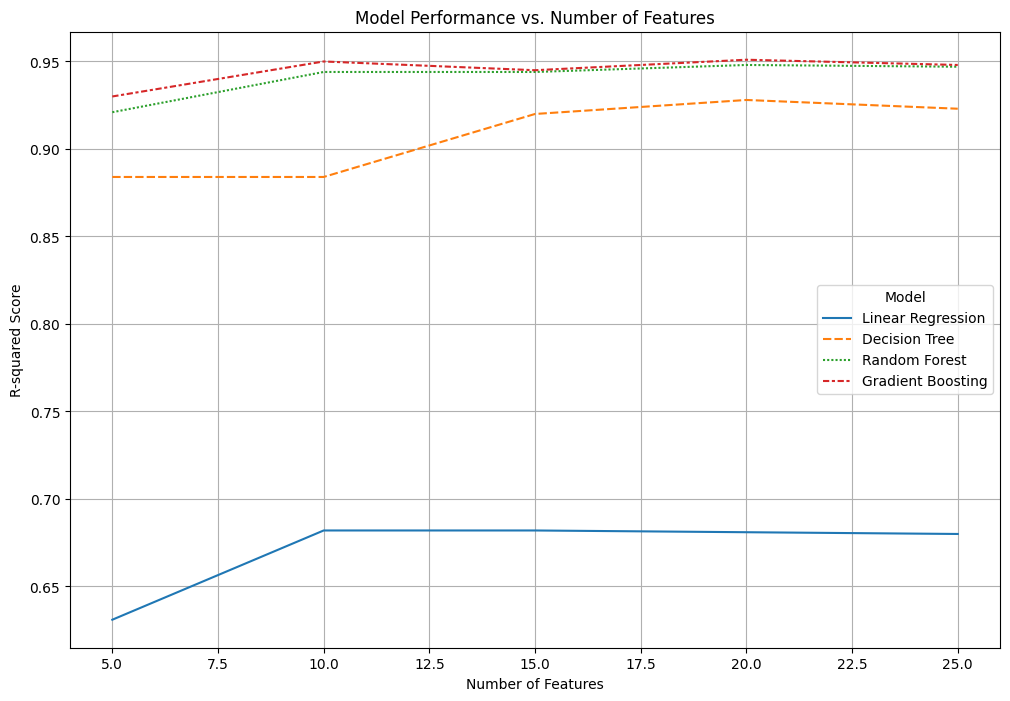

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example results data - ensure it matches with the number of feature sets
results = {
    'Linear Regression': [0.631, 0.682, 0.682, 0.681, 0.680],  
    'Decision Tree': [0.884, 0.884, 0.920, 0.928, 0.923],
    'Random Forest': [0.921, 0.944, 0.944, 0.948, 0.947],
    'Gradient Boosting': [0.930, 0.950, 0.945, 0.951, 0.948]
}

n_features = [5, 10, 15, 20]  

# If results and n_features length mismatch, adjust accordingly
# Example correction if results have 5 feature counts:
df_results = pd.DataFrame(results, index=[5, 10, 15, 20, 25])  

# Plot the results
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_results)
plt.title('Model Performance vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R-squared Score')
plt.legend(title='Model')
plt.grid(True)
plt.show()
